# 1.  Data Extractions

##  Step 1: Data is extracted using Youtube API on Appscript, imported as an excel sheet.
//Code for Keyword Search  : Js code

function YouTubeData() {
  var spreadSheet = SpreadsheetApp.getActiveSpreadsheet();
  var activeSheet = spreadSheet.getActiveSheet();
  
  var search = YouTube.Search.list("snippet, id", {q: "Data Science", maxResults: 50});
  var videoIds = search.items.map(item => item.id.videoId).join(",");

  var videoDetails = YouTube.Videos.list("snippet,statistics", {id: videoIds});
  var channelDetails = YouTube.Channels.list("snippet,statistics", {id: videoDetails.items.map(item => item.snippet.channelId).join(",")});

  var data = videoDetails.items.map(video => {
    var channel = channelDetails.items.find(channel => channel.id === video.snippet.channelId);
    return [video.id, video.snippet.title, channel.snippet.title, video.statistics.viewCount, video.statistics.likeCount, video.statistics.commentCount, channel.statistics.subscriberCount];
  });

  activeSheet.getRange(2, 1, data.length, data[0].length).setValues(data);
}


#### Google Apps Script code for a YouTube scraper that uses the YouTube API to gather information about videos related to "data science". The code searches for videos, retrieves the video IDs, and then gets the video information such as the title, channel name, subscriber count, view count, like count, dislike count, and comment count. The retrieved information is then written to a Google Sheet.


# 2. Data Cleaning and Processing

In [1]:
import pandas as pd
import numpy as np

# Visvalization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
ds = pd.read_excel(r'C:\Users\Rizwanaa\OneDrive\Desktop\Data_Science.xlsx')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Video_ID          50 non-null     object
 1   Channel_Ttile     50 non-null     object
 2   Channel_Name      50 non-null     object
 3   View_Count        50 non-null     int64 
 4   Like_Count        50 non-null     int64 
 5   Comment_Count     50 non-null     int64 
 6   Subscriber_Count  50 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


In [4]:
ds.isnull().any()

Video_ID            False
Channel_Ttile       False
Channel_Name        False
View_Count          False
Like_Count          False
Comment_Count       False
Subscriber_Count    False
dtype: bool

In [5]:
ds = pd.DataFrame(ds)

In [6]:
ds.tail()

,Video_ID,Channel_Ttile,Channel_Name,View_Count,Like_Count,Comment_Count,Subscriber_Count
45,Z79AqDouS-Y,How I'd Learn Data Science In 2023 (If I Could...,Data Nash,3139,233,35,4150
46,T08eJt9DlgU,Data Scientist vs Data Analyst - Which Is Righ...,CareerFoundry,10870,372,12,158000
47,pLon_Mit7sk,day in the life of a Business Analyst at Spoti...,Lillian Chiu,246153,6975,246,173000
48,HqoLnQ0X-F8,Full Data Science Roadmap for Beginner,Ayush Singh,47227,1889,117,35900
49,qrhRfPY4F4w,The most important skills of data scientists |...,TEDx Talks,250949,3889,94,37500000


In [7]:
ds.shape

(50, 7)

In [8]:
ds.size

350

In [9]:
ds.columns

Index(['Video_ID ', 'Channel_Ttile', 'Channel_Name', 'View_Count',
       'Like_Count', 'Comment_Count', 'Subscriber_Count'],
      dtype='object')

In [10]:
len(ds)

50

In [11]:
ds

,Video_ID,Channel_Ttile,Channel_Name,View_Count,Like_Count,Comment_Count,Subscriber_Count
0,X3paOmcrTjQ,Data Science In 5 Minutes | Data Science For B...,Simplilearn,3231797,47521,1085,2800000
1,RBSUwFGa6Fk,What is Data Science?,IBM Technology,60188,1990,47,379000
2,ua-CiDNNj30,Learn Data Science Tutorial - Full Course for ...,freeCodeCamp.org,2504045,57663,945,7180000
3,xC-c7E5PK0Y,What REALLY is Data Science? Told by a Data Sc...,Joma Tech,3277329,126792,3645,2080000
4,-ETQ97mXXF0,Data Science Full Course - Learn Data Science ...,edureka!,2992711,63014,673,3690000
5,ZWgRvW8d_N4,How I Would Learn Data Science in 2023? (If I ...,Sundas Khalid,57616,2575,124,109000
6,t6CD1EwU5kc,How I Would NOT Learn Data Science in 2023.,Ken Jee,65164,2509,195,235000
7,pn0PUY0jwGQ,The Harsh Reality of Being a Data Scientist,Sundas Khalid,364605,6944,965,109000
8,0w9BAIVGuCA,How I Would Learn Data Science in 2023 (if I h...,Internet Made Coder,7642,462,43,208000
9,ho9vNL4MYZ8,Top Courses to Learn Data Science Skills FAST!,Thu Vu data analytics,88502,4886,137,118000


## Analysis on the extracted data

#### Comparison metrics on the attributes Like_Count, View_Count, Subscriber_Count using various visualization librarires in python

- Video_Title Vs View_Count

c:\users\rizwanaa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\rizwanaa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\rizwanaa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\rizwanaa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\rizwanaa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129327 (\

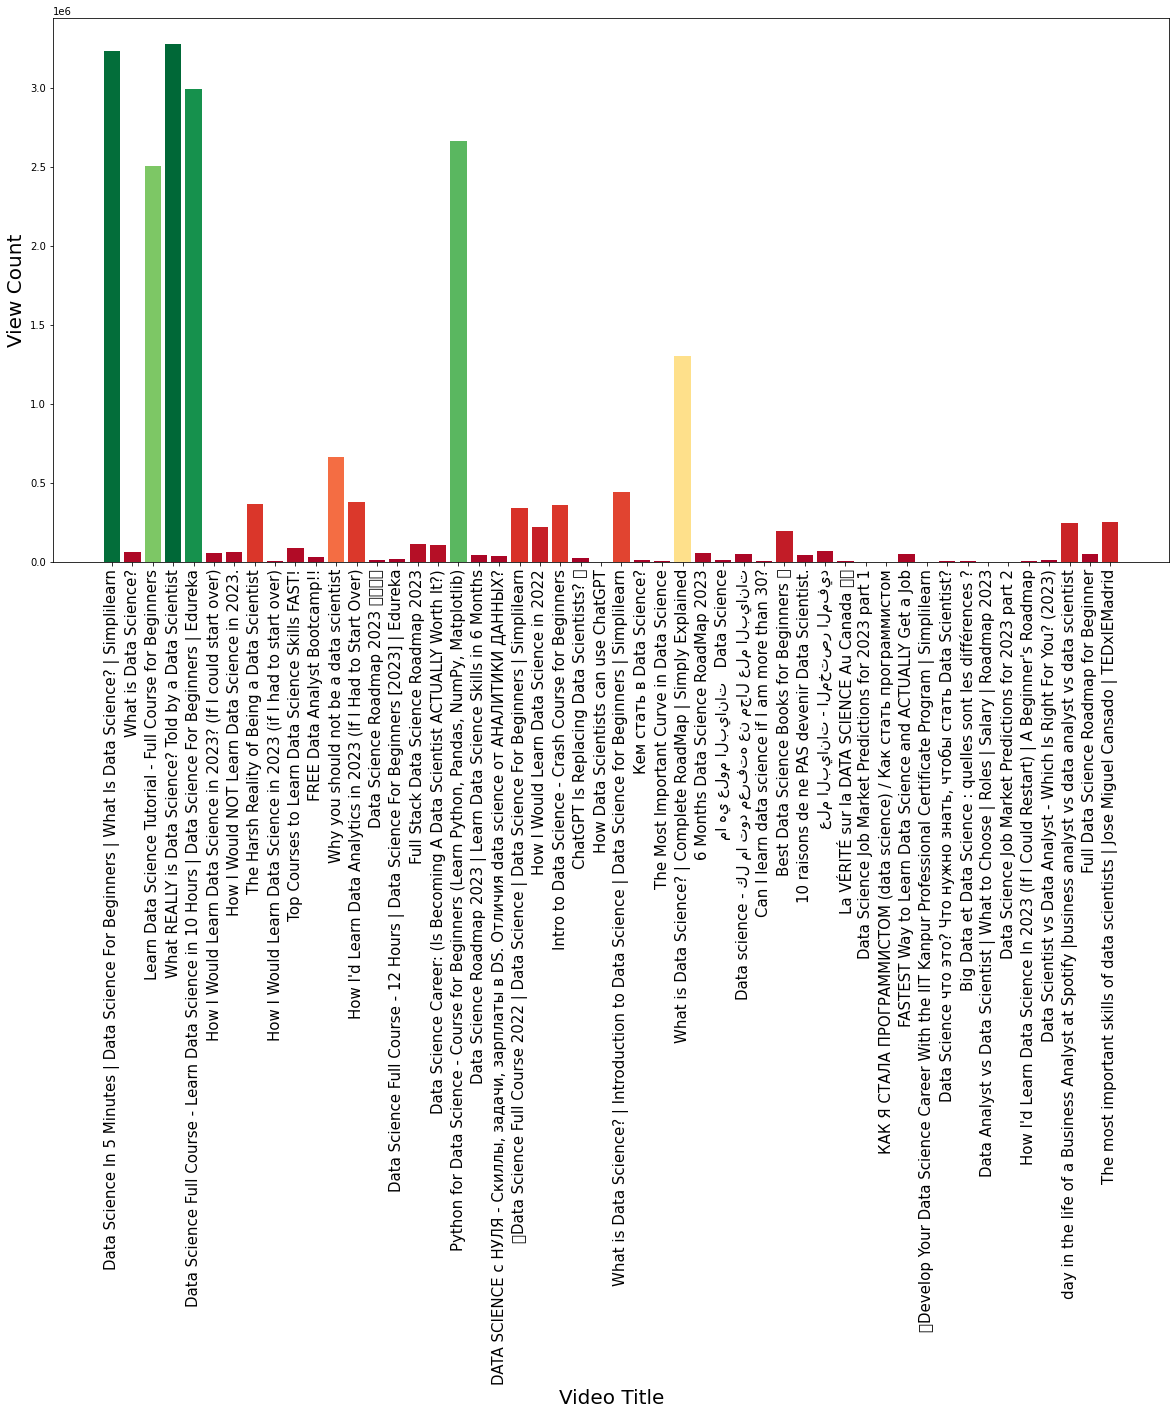

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
cmap = plt.get_cmap("RdYlGn")
bars = ax.bar(ds['Channel_Ttile'], ds['View_Count'], color=cmap(ds['View_Count'] / ds['View_Count'].max()))


# Set the labels for the x-axis and y-axis
ax.set_xlabel('Video Title', fontsize=20)
ax.set_ylabel('View Count', fontsize=20)
plt.xticks(rotation=90, fontsize=15)

# Set the font size for the video titles to be larger
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)


fig.set_size_inches(20, 10)


plt.show()

In [13]:
# fig, ax = plt.subplots()
# ax.scatter(ds['View_Count'], ds['Like_Count'], color='red')

# # Set the labels for the x-axis and y-axis
# ax.set_xlabel('View Count')
# ax.set_ylabel('Like Count')

# # Show the first plot
# plt.show()

# # Create the second scatter plot
# fig, ax = plt.subplots()
# ax.scatter(ds['View_Count'], ds['Comment_Count'], color='blue')

# # Set the labels for the x-axis and y-axis
# ax.set_xlabel('View Count')
# ax.set_ylabel('Comment Count')

# # Show the second plot
# plt.show()

- Like_Count VS View_Count ,  Commen_ Count VS View_Count  ,  Subscriber_Count VS View_Count



<AxesSubplot:xlabel='Subscriber_Count', ylabel='View_Count'>

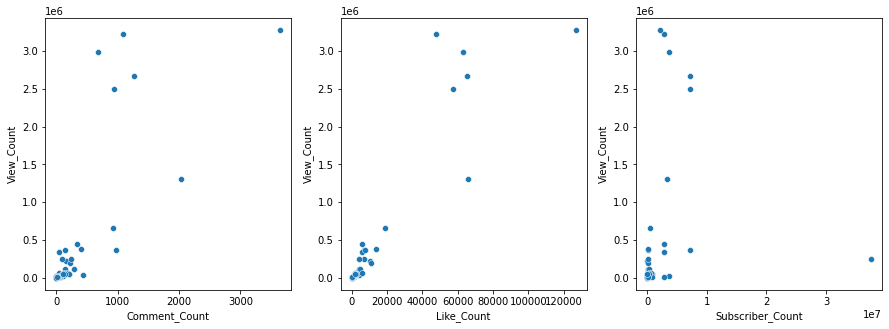

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data = ds, x="Comment_Count", y="View_Count", ax=ax[0])
sns.scatterplot(data = ds, x="Like_Count", y="View_Count", ax=ax[1])
sns.scatterplot(data = ds, x="Subscriber_Count", y="View_Count", ax=ax[2])



- To find the realtionship between View_Count VS Like_Count as well as the distribution of each varible : Joint Plot is used

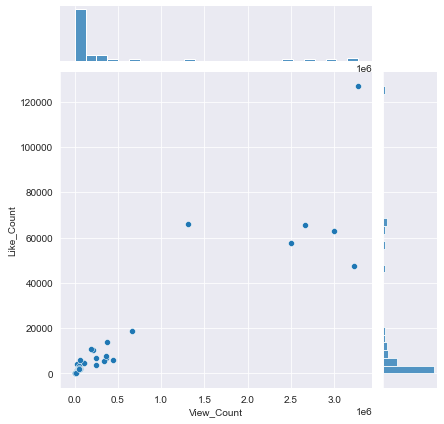

In [15]:
sns.set_style('darkgrid')
sns.jointplot(x="View_Count", y="Like_Count", data=ds)

# Show the plot
plt.show()

- Channels VS Subscriber_Count 

In [16]:
ds_unique = ds.drop_duplicates(subset='Channel_Name')
ds_grouped = ds_unique.groupby(by='Channel_Name')['Subscriber_Count'].sum()
ds_grouped = ds_grouped.reset_index()
df_unique = ds.groupby('Channel_Name').agg({'Subscriber_Count': 'sum'}).reset_index()

In [17]:
ds_grouped

,Channel_Name,Subscriber_Count
0,Alex The Analyst,368000
1,Ali Shahin,390000
2,Apna College,3280000
3,Arsh Goyal,121000
4,Ayush Singh,35900
5,Be Geek,46600
6,CareerFoundry,158000
7,D4 DATA,753
8,Data From Scratch - Willis,3870
9,Data Nash,4150


In [18]:
ds_grouped.empty
ds_grouped.shape
ds_grouped.isna().sum()
ds_grouped.dtypes

print(ds_grouped.isnull().sum().sum())

0


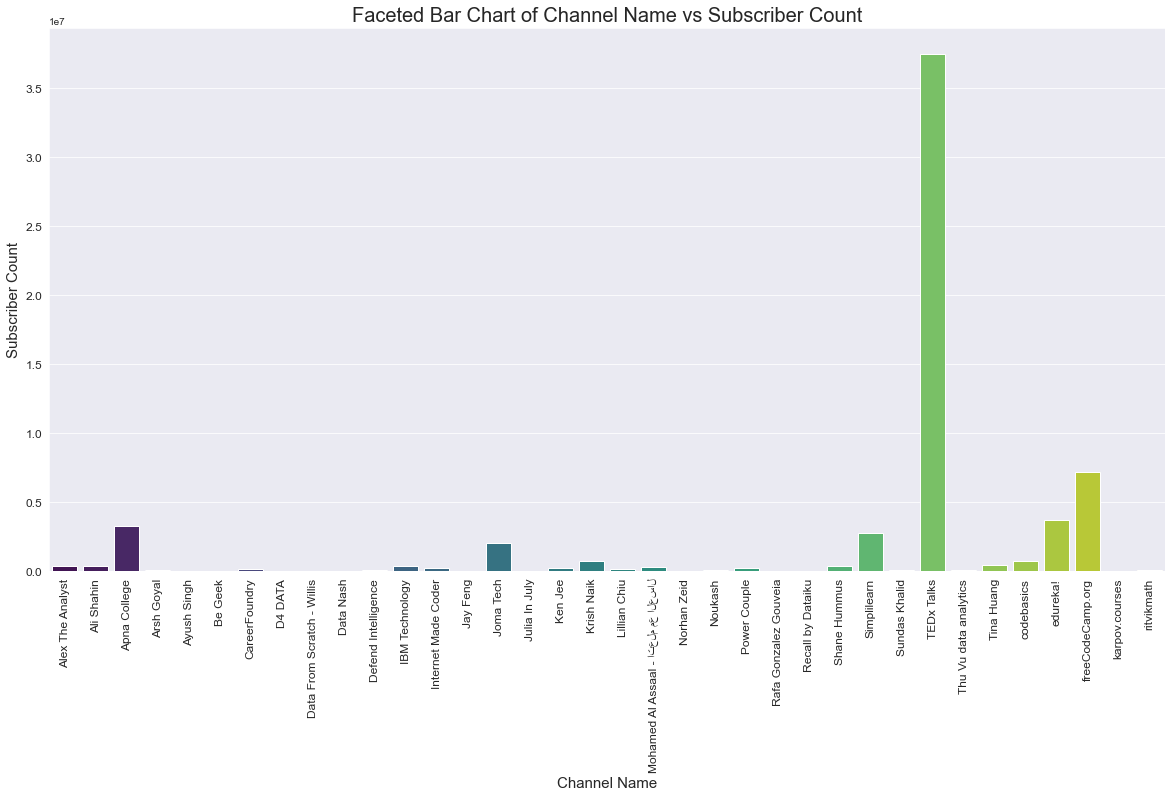

In [19]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x='Channel_Name', y='Subscriber_Count', data=ds_grouped, palette='viridis', ax=ax)

ax.set_xlabel('Channel Name', fontsize=15)
ax.set_ylabel('Subscriber Count', fontsize=15)
ax.set_title('Faceted Bar Chart of Channel Name vs Subscriber Count', fontsize=20)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Applying Normalized Comparison 

In [25]:
def compare_channels(ds):
    # Create new columns to store the normalized values
    ds['Like_Count_Norm'] = ds['Like_Count'] / ds['Like_Count'].sum()
    ds['View_Count_Norm'] = ds['View_Count'] / ds['View_Count'].sum()
    ds['Subscriber_Count_Norm'] = ds['Subscriber_Count'] / ds['Subscriber_Count'].sum()
    #ds['Comment_Count_Norm'] = ds['Comment_Count'] / ds['Comment_Count'].sum()

    # Create a score column
    ds['Score'] = ds['Like_Count_Norm'] + ds['View_Count_Norm'] + ds['Subscriber_Count_Norm']
    
    
    # Sort the dataframe in descending order by the Score column
    ds = ds.sort_values(by='Score', ascending=False)


    # Create a new dataframe with the top 12 rows
    top_12 = ds.head(12)

    return top_12

# Call the function and store the result in a new dataframe
result = compare_channels(ds)

In [26]:
result

,Video_ID,Channel_Ttile,Channel_Name,View_Count,Like_Count,Comment_Count,Subscriber_Count,Like_Count_Norm,View_Count_Norm,Subscriber_Count_Norm,Score
49,qrhRfPY4F4w,The most important skills of data scientists |...,TEDx Talks,250949,3889,94,37500000,0.006822,0.012255,0.416194,0.435271
3,xC-c7E5PK0Y,What REALLY is Data Science? Told by a Data Sc...,Joma Tech,3277329,126792,3645,2080000,0.222416,0.160044,0.023085,0.405545
17,LHBE6Q9XlzI,Python for Data Science - Course for Beginners...,freeCodeCamp.org,2666741,65342,1262,7180000,0.114622,0.130226,0.079687,0.324535
2,ua-CiDNNj30,Learn Data Science Tutorial - Full Course for ...,freeCodeCamp.org,2504045,57663,945,7180000,0.101151,0.122281,0.079687,0.303120
4,-ETQ97mXXF0,Data Science Full Course - Learn Data Science ...,edureka!,2992711,63014,673,3690000,0.110538,0.146145,0.040953,0.297636
0,X3paOmcrTjQ,Data Science In 5 Minutes | Data Science For B...,Simplilearn,3231797,47521,1085,2800000,0.083361,0.157820,0.031076,0.272256
28,jtn-hRJjl68,What is Data Science? | Complete RoadMap | Sim...,Apna College,1305937,65920,2024,3280000,0.115636,0.063774,0.036403,0.215812
22,N6BghzuFLIg,Intro to Data Science - Crash Course for Begin...,freeCodeCamp.org,360367,7508,140,7180000,0.013170,0.017598,0.079687,0.110456
11,sOZ8MxFw8TQ,Why you should not be a data scientist,Tina Huang,661960,18882,928,454000,0.033122,0.032326,0.005039,0.070487
25,KxryzSO1Fjs,What is Data Science? | Introduction to Data S...,Simplilearn,443112,6059,340,2800000,0.010629,0.021639,0.031076,0.063343


In [27]:
result = result.reset_index(drop=True)
result

,Video_ID,Channel_Ttile,Channel_Name,View_Count,Like_Count,Comment_Count,Subscriber_Count,Like_Count_Norm,View_Count_Norm,Subscriber_Count_Norm,Score
0,qrhRfPY4F4w,The most important skills of data scientists |...,TEDx Talks,250949,3889,94,37500000,0.006822,0.012255,0.416194,0.435271
1,xC-c7E5PK0Y,What REALLY is Data Science? Told by a Data Sc...,Joma Tech,3277329,126792,3645,2080000,0.222416,0.160044,0.023085,0.405545
2,LHBE6Q9XlzI,Python for Data Science - Course for Beginners...,freeCodeCamp.org,2666741,65342,1262,7180000,0.114622,0.130226,0.079687,0.324535
3,ua-CiDNNj30,Learn Data Science Tutorial - Full Course for ...,freeCodeCamp.org,2504045,57663,945,7180000,0.101151,0.122281,0.079687,0.303120
4,-ETQ97mXXF0,Data Science Full Course - Learn Data Science ...,edureka!,2992711,63014,673,3690000,0.110538,0.146145,0.040953,0.297636
5,X3paOmcrTjQ,Data Science In 5 Minutes | Data Science For B...,Simplilearn,3231797,47521,1085,2800000,0.083361,0.157820,0.031076,0.272256
6,jtn-hRJjl68,What is Data Science? | Complete RoadMap | Sim...,Apna College,1305937,65920,2024,3280000,0.115636,0.063774,0.036403,0.215812
7,N6BghzuFLIg,Intro to Data Science - Crash Course for Begin...,freeCodeCamp.org,360367,7508,140,7180000,0.013170,0.017598,0.079687,0.110456
8,sOZ8MxFw8TQ,Why you should not be a data scientist,Tina Huang,661960,18882,928,454000,0.033122,0.032326,0.005039,0.070487
9,KxryzSO1Fjs,What is Data Science? | Introduction to Data S...,Simplilearn,443112,6059,340,2800000,0.010629,0.021639,0.031076,0.063343
